## Exploratory Data Analysis (EDA) on Retail Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Cleaning

In [2]:
df = pd.read_csv("retail_sales_dataset.csv",parse_dates=['Date'])
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df = df.rename(columns={'Total Amount': 'TotalAmount'})


In [5]:
df1=df.isnull().sum
df1

<bound method DataFrame.sum of      Transaction ID   Date  Customer ID  Gender    Age  Product Category  \
0             False  False        False   False  False             False   
1             False  False        False   False  False             False   
2             False  False        False   False  False             False   
3             False  False        False   False  False             False   
4             False  False        False   False  False             False   
..              ...    ...          ...     ...    ...               ...   
995           False  False        False   False  False             False   
996           False  False        False   False  False             False   
997           False  False        False   False  False             False   
998           False  False        False   False  False             False   
999           False  False        False   False  False             False   

     Quantity  Price per Unit  TotalAmount  
0       Fal

In [6]:
pd.isnull(df).sum()  #to check for null values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
TotalAmount         0
dtype: int64

In [7]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
TotalAmount                  int64
dtype: object

In [8]:
df = df.drop_duplicates()

## Descriptive Statistics

In [9]:
mean_value=df['TotalAmount'].mean()
median_value=df['TotalAmount'].median()
mode_value=df['TotalAmount'].mode()
std_value=df['TotalAmount'].std()
print(f"Mean: {mean_value},Median: {median_value},Mode: {mode_value},standard_deviation: {std_value}")

Mean: 456.0,Median: 135.0,Mode: 0    50
Name: TotalAmount, dtype: int64,standard_deviation: 559.997631555123


##  Time Series Analysis

 Analysing the sales based on monthly and yearly growth

In [10]:
# Set 'date' column as the index
df.sort_values(by='Date', inplace=True)
print(df)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
521             522 2023-01-01     CUST522    Male   46           Beauty   
179             180 2023-01-01     CUST180    Male   41         Clothing   
558             559 2023-01-01     CUST559  Female   40         Clothing   
302             303 2023-01-02     CUST303    Male   19      Electronics   
978             979 2023-01-02     CUST979  Female   19           Beauty   
..              ...        ...         ...     ...  ...              ...   
232             233 2023-12-29     CUST233  Female   51           Beauty   
804             805 2023-12-29     CUST805  Female   30           Beauty   
856             857 2023-12-31     CUST857    Male   60      Electronics   
210             211 2024-01-01     CUST211    Male   42           Beauty   
649             650 2024-01-01     CUST650    Male   55      Electronics   

     Quantity  Price per Unit  TotalAmount  
521         3             500         1500

In [11]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

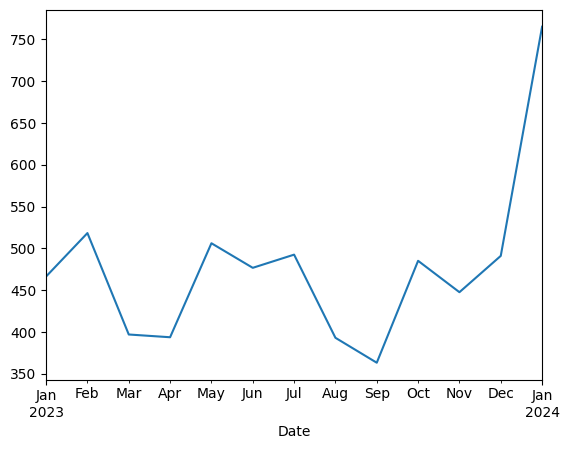

In [12]:
#monthly sales 
monthly_sale=df['TotalAmount'].resample('ME').mean()
monthly_sale.plot()

<Axes: xlabel='Date'>

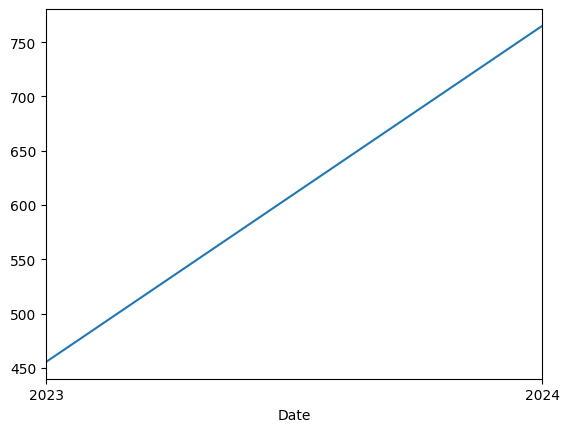

In [13]:
#yearly sales
yearly_quantity=df['TotalAmount'].resample('YE').mean()
yearly_quantity.plot()

## Customer and Product Analysis
We can analyze the demographics of customers and their purchasing behavior.

In [14]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'TotalAmount'],
      dtype='object')

In [15]:
gender = df.groupby('Gender')['TotalAmount'].mean()
print(gender)

Gender
Female    456.549020
Male      455.428571
Name: TotalAmount, dtype: float64


In [16]:
Age= df.groupby('Age')['TotalAmount'].mean().sort_values(ascending=False).head(10)
print(Age)

Age
37    728.125000
19    708.095238
26    635.454545
21    629.250000
33    624.000000
36    607.000000
34    599.464286
38    584.210526
43    579.677419
53    559.411765
Name: TotalAmount, dtype: float64


In [17]:
products_amount = df.groupby('Product Category')['TotalAmount'].sum().sort_values(ascending=False)
print(products_amount)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: TotalAmount, dtype: int64


In [18]:
# gender and product category
gender_product_purchased=pd.crosstab(df['Gender'], df['Product Category'])
print(gender_product_purchased)

Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               166       174          170
Male                 141       177          172


## Visualization
You can visualize different insights, such as sales trends, customer demographics, or correlations between variables.

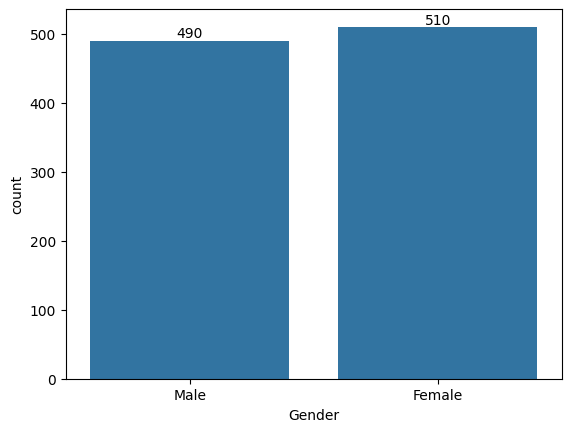

In [19]:
ax=sns.countplot(x= 'Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='TotalAmount'>

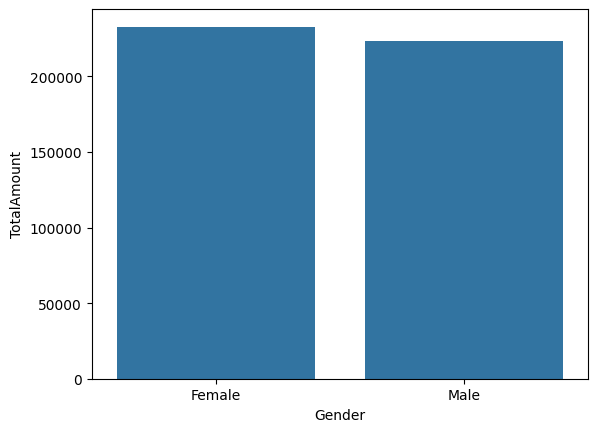

In [20]:
# Group by Gender and calculate total amount for each product
quantity_sold = df.groupby(['Gender'],as_index=False)['TotalAmount'].sum().sort_values(by='TotalAmount',ascending=False)
sns.barplot(x= 'Gender', y= 'TotalAmount', data= quantity_sold)

From the above graph it is clear that female have spend more amount than male for purchasing.

<Axes: xlabel='Product Category', ylabel='Quantity'>

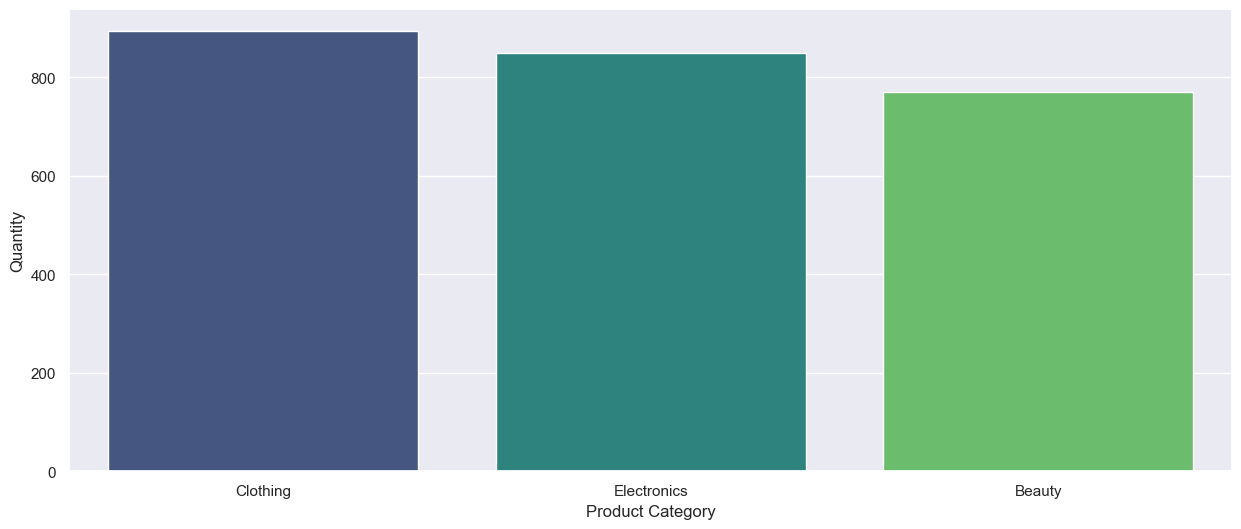

In [21]:
# Product demographics analysis 
product_demographics= df.groupby(['Product Category'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(data= product_demographics, x='Product Category',y='Quantity',hue='Product Category', palette='viridis', legend=False)


From the above plot it is clear that female are spending more for purchasing than male and also in terms of product category it is clear that Electronics are purchased more and the least for Beauty product.

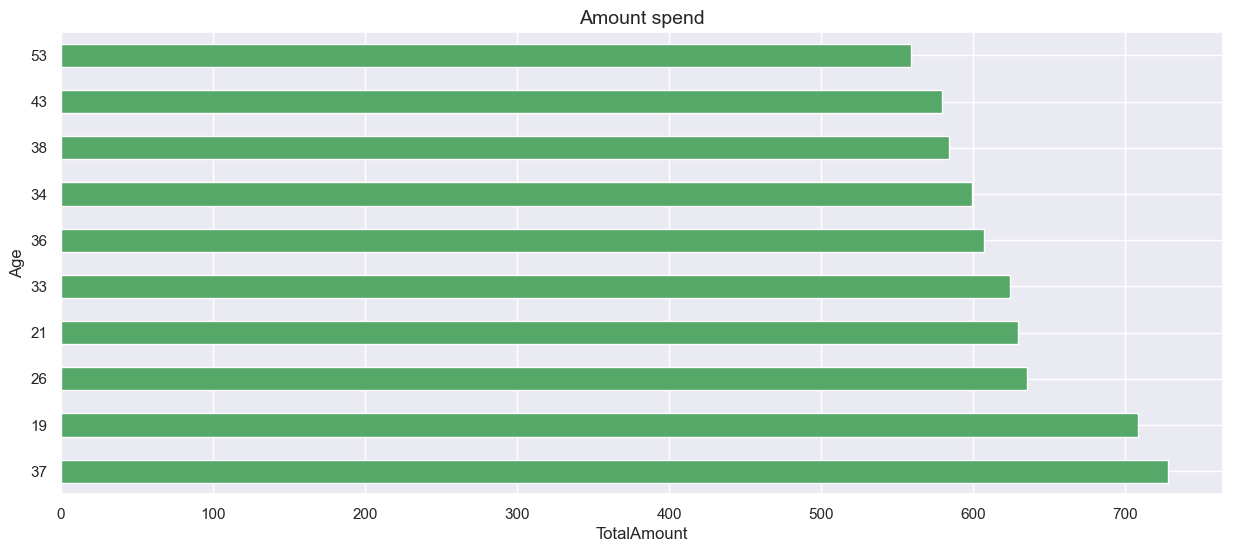

In [22]:
Age.plot(kind='barh',color='g')
plt.title("Amount spend",fontsize=14)
plt.xlabel('TotalAmount')
plt.ylabel('Age')
plt.show()

In the above bar graph it is clear that person having age of 37 spend more amount spend followed by 19 years old age group.

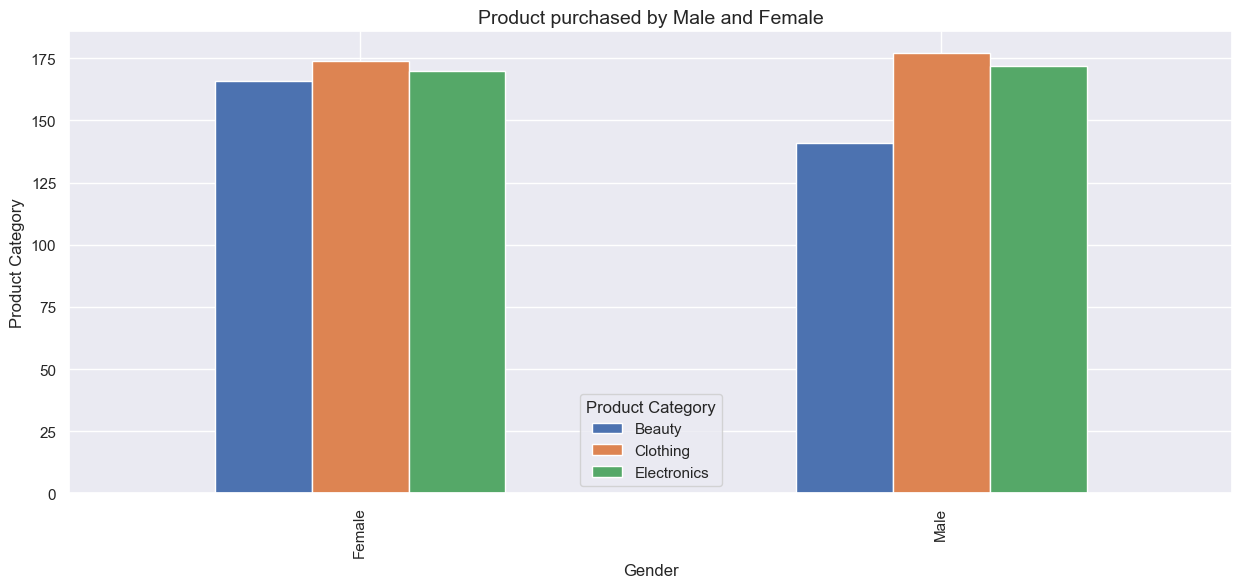

In [23]:
#Comparing the product purchased based on gender by ploting bar graph
gender_product_purchased.plot(kind='bar')
plt.title("Product purchased by Male and Female",fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.show()


## Recommendation


##### Analyze Monthly Fluctuations:
Since there have been fluctuation in totals from January 2023 to January 2024, it’s important to figure out what caused these changes. To understand the drivers of spikes, particularly in February 2023 and January 2024, it is necessary to take a close look at outside factors such as seasons, special sales, or economic events etc.

##### Identify Outliers and Events:
The significant spikes in February 2023 and January 2024 suggest potential outliers or events that may have influenced spending patterns. Check if these spikes are linked to things like marketing campaigns, sales, holidays, or changes in the economy. Understanding these events can help make better predictions and improve planning for future sales

#### Targeted Product Promotions by Gender:

##### Clothing as a Core Focus for Both Genders: 
Since both females (174 purchases) and males (177 purchases) show strong interest in Clothing, consider launching targeted, gender-specific Clothing promotions. Create personalized offers that appeal to the distinct preferences of each gender, potentially offering exclusive designs, seasonal collections, or discounts tailored to these customer groups.
Beauty Products for Female Shoppers:

##### Expand Beauty Offerings for Females: 
The slightly higher interest in Beauty products among females (166 purchases) presents an opportunity to introduce new beauty product lines, bundled deals, or exclusive beauty promotions aimed at female shoppers.
Electronics Engagement for Males:

##### Targeted Promotions for Males in Electronics:
Males showed significant interest in Electronics (172 purchases), which makes it a key area for growth. Consider special offers such as bundle deals, rewards, or flash sales in the Electronics category. Additionally, targeted marketing campaigns can be designed to highlight the latest tech products, gadgets, or seasonal promotions.

Overall, by giving cross-category promotion,it will encourage the customers to explore products in multiple categories such as Clothing, Beauty, and Electronics. For instance, offer a discount on Beauty products with a Clothing purchase or vice versa. Similarly, for males who purchase electronics, consider recommending complementary items from the Clothing category, promoting a wider range of products across gender-based preferences.

##### Continuous Monitoring and Trend Adjustments:
It is also important to regularly review sales data to adjust product offerings, promotions, and marketing strategies in response to emerging trends and customer preferences. As the data reveals that the treands gets fluctuates over time, which indicates that continuous monitoring of purchasing behaviours.

##### Adapt to Changing Purchasing Patterns: 
The data reveals that trends fluctuate over time, signaling the need for continuous monitoring of purchasing behaviors. Regularly review sales data to adjust product offerings, promotions, and marketing strategies in response to emerging trends and customer preferences. Utilize these insights to refine product assortments, inventory management, and marketing efforts for optimal engagement.
By applying these insights, businesses can better adjust their strategies to match changing customer preferences and market trends, leading to a more focused approach that boosts growth and enhances customer satisfaction.



